# Connect To Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import time
import missingno as msno
import numpy as np
import sys

# Logging Setup

In [ ]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [ ]:
# Create logger
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Clear existing handlers
if logger.hasHandlers():
    logger.handlers.clear()

# Create console handler and set level to info
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)

# Create formatter and add it to the handler
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)

# Add the handler to the logger
logger.addHandler(console_handler)

# Example log
# logging.info("This will be printed in Google Colab!")

# Function Load Data

In [ ]:
def loadData(trainPath, testPath):
  trainData = pd.read_csv(trainPath)
  testData = pd.read_csv(testPath)
  logging.info("Data load is success")
  return trainData, testData

In [ ]:
trainData, testData = loadData('/content/drive/MyDrive/GDP Labs Test/help_mr_sunarto_train.csv','/content/drive/MyDrive/GDP Labs Test/help_mr_sunarto_test.csv')

2024-09-16 07:53:15,648 - INFO - Data load is success


## Show Data

In [ ]:
trainData.head()

,EmployeeID,FirstName,LastName,YearOfBirth,GENDER,Age,haveChildren,MARITALSTATUS,DriveDistanceMiles,DriveDistanceKM,Mode
0,516895446793,Elok,Tjahja,1988,F,31,0,S,0.34,0.547176,Car
1,541003144521,Bisma,Armeilia,1966,M,53,0,S,0.41,0.659829,Public Transportasion
2,777065279869,Garini,Arman,1982,F,37,0,S,0.49,0.788577,Bike
3,814089931249,Abiyasa,Solichin,1978,MALE,41,0,S,0.50,0.804670,Bike
4,349516057593,Ganendra,Anindya,1932,M,87,1,M,0.50,NaN,Public-Transportation


## Check Shape Data

In [ ]:
trainData.shape

(3838, 11)

## Check All feature

In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838 entries, 0 to 3837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          3838 non-null   int64  
 1   FirstName           3838 non-null   object 
 2   LastName            3838 non-null   object 
 3   YearOfBirth         3838 non-null   int64  
 4   GENDER              3838 non-null   object 
 5   Age                 3838 non-null   int64  
 6   haveChildren        3838 non-null   int64  
 7   MARITALSTATUS       3832 non-null   object 
 8   DriveDistanceMiles  3838 non-null   float64
 9   DriveDistanceKM     3819 non-null   float64
 10  Mode                3838 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 330.0+ KB


In [ ]:
trainData.columns.values

array(['EmployeeID', 'FirstName', 'LastName', 'YearOfBirth', 'GENDER',
       'Age', 'haveChildren', 'MARITALSTATUS', 'DriveDistanceMiles',
       'DriveDistanceKM', 'Mode'], dtype=object)

In [ ]:
trainData.dtypes

,0
EmployeeID,int64
FirstName,object
LastName,object
YearOfBirth,int64
GENDER,object
Age,int64
haveChildren,int64
MARITALSTATUS,object
DriveDistanceMiles,float64
DriveDistanceKM,float64


## Check Number of class

In [ ]:
genderCounts = trainData['GENDER'].value_counts()
print(genderCounts)


GENDER
M          2094
F          1730
FEMALE        8
MALE          4
Unknown       2
Name: count, dtype: int64


In [ ]:
trainData[trainData['GENDER'] == 'Unknown']

,EmployeeID,FirstName,LastName,YearOfBirth,GENDER,Age,haveChildren,MARITALSTATUS,DriveDistanceMiles,DriveDistanceKM,Mode
914,981790136291,Agnibrata,Hadisurjo,1933,Unknown,86,0,Null,8.86,14.258752,Car
2070,628750640780,Darsa,Sulestio,1933,Unknown,86,0,S,8.86,14.258752,Car


In [ ]:
haveChildrenCounts = trainData['haveChildren'].value_counts()
print(haveChildrenCounts)

haveChildren
1    2051
0    1787
Name: count, dtype: int64


In [ ]:
maritalSCounts = trainData['MARITALSTATUS'].value_counts()
print(maritalSCounts)

MARITALSTATUS
M       2051
S       1778
Null       3
Name: count, dtype: int64


In [ ]:
modeCounts = trainData['Mode'].value_counts()
print(modeCounts)

Mode
Car                      2381
Bike                      324
Public Transportasion     197
Pubilc Transportation     194
Pbulic Transportation     193
Public-Transportation     189
Public Transportation     187
PublicTransportation      173
Name: count, dtype: int64


## Check Missing Value

<Axes: >

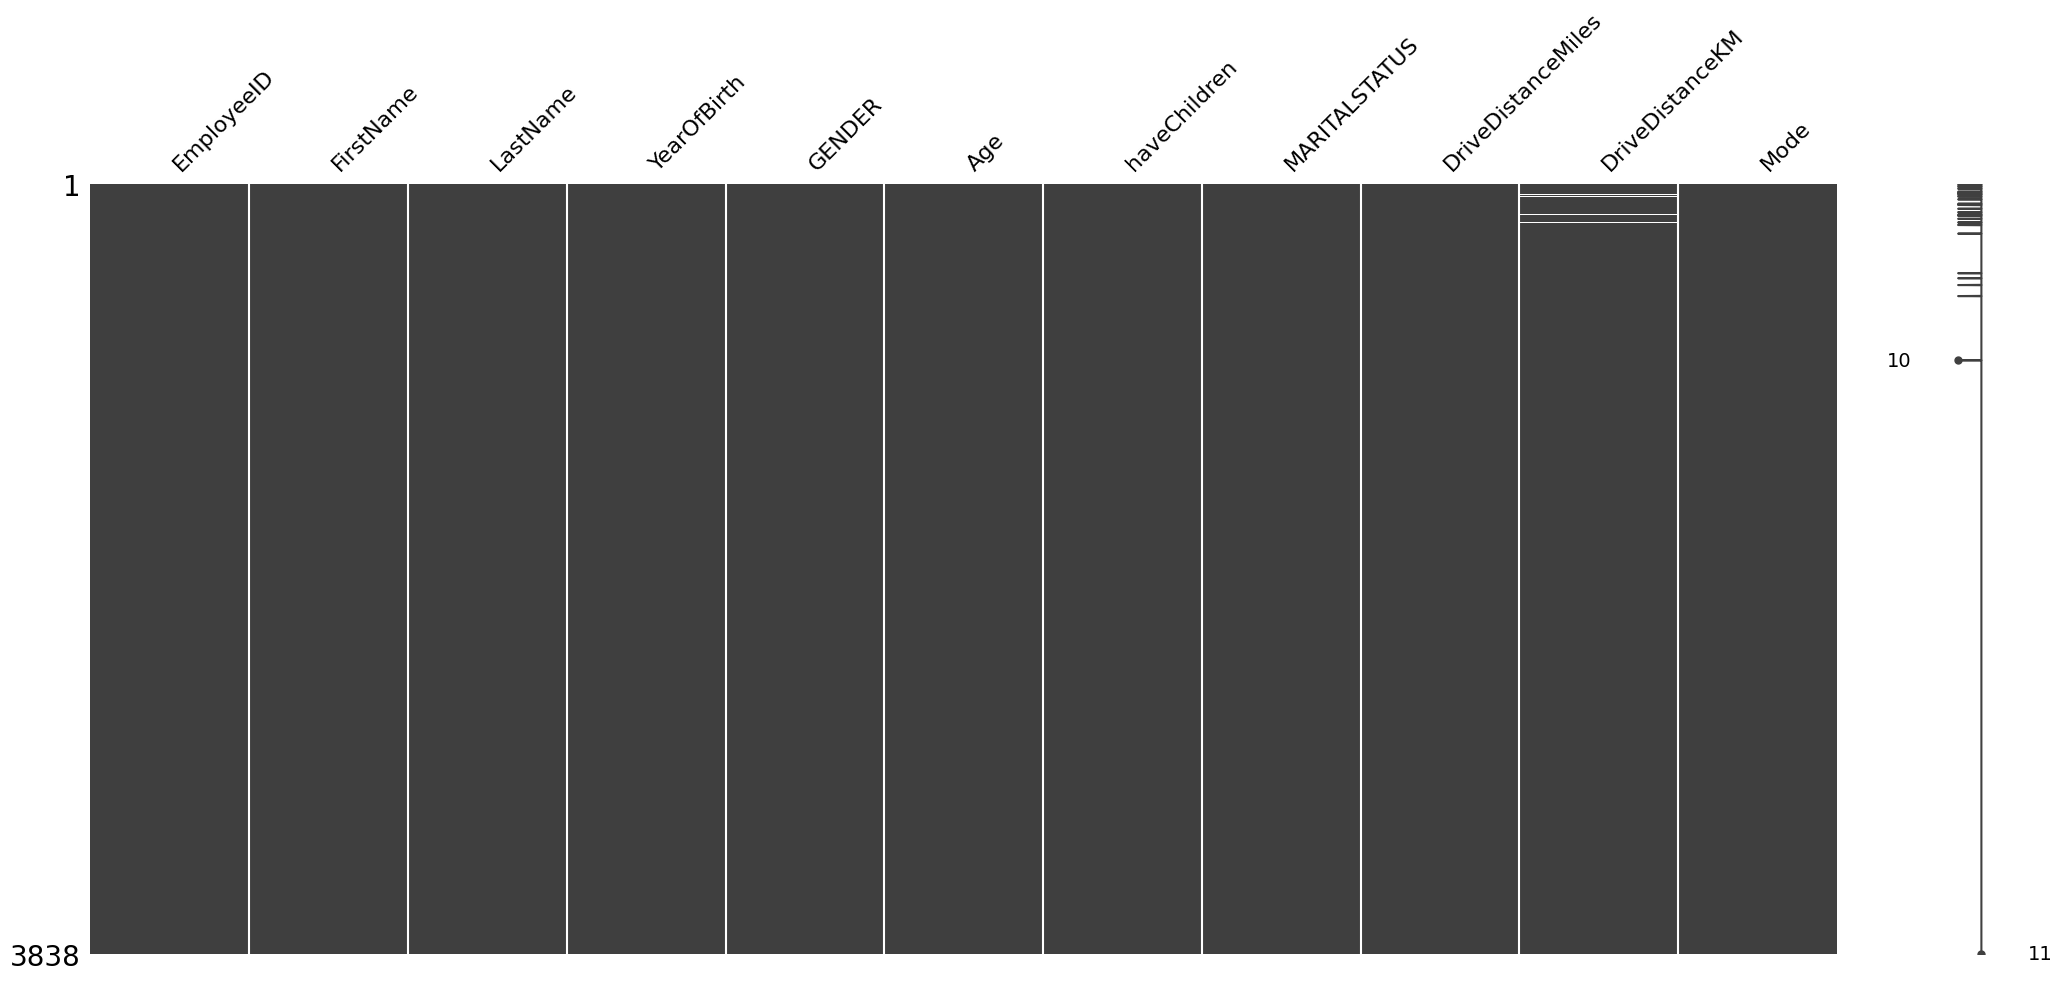

In [ ]:
msno.matrix(trainData)

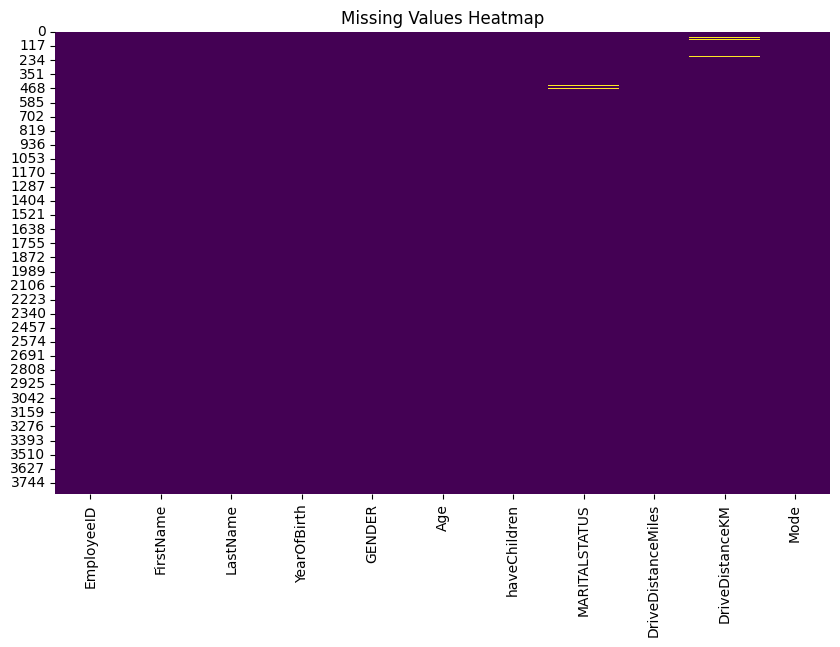

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(trainData.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Check Duplication

In [ ]:
print("Len Data Before:", len(trainData))

duplikat = trainData.duplicated()

if duplikat.any():
    print("\nFounded. Data Duplicate:")
    print(trainData[duplikat])
    dfCleaned = trainData.drop_duplicates()
    print("\nLen Data After:", len(dfCleaned))
else:
    print("\nNot Founded")

Len Data Before: 3838

Not Founded


## Check Correlation

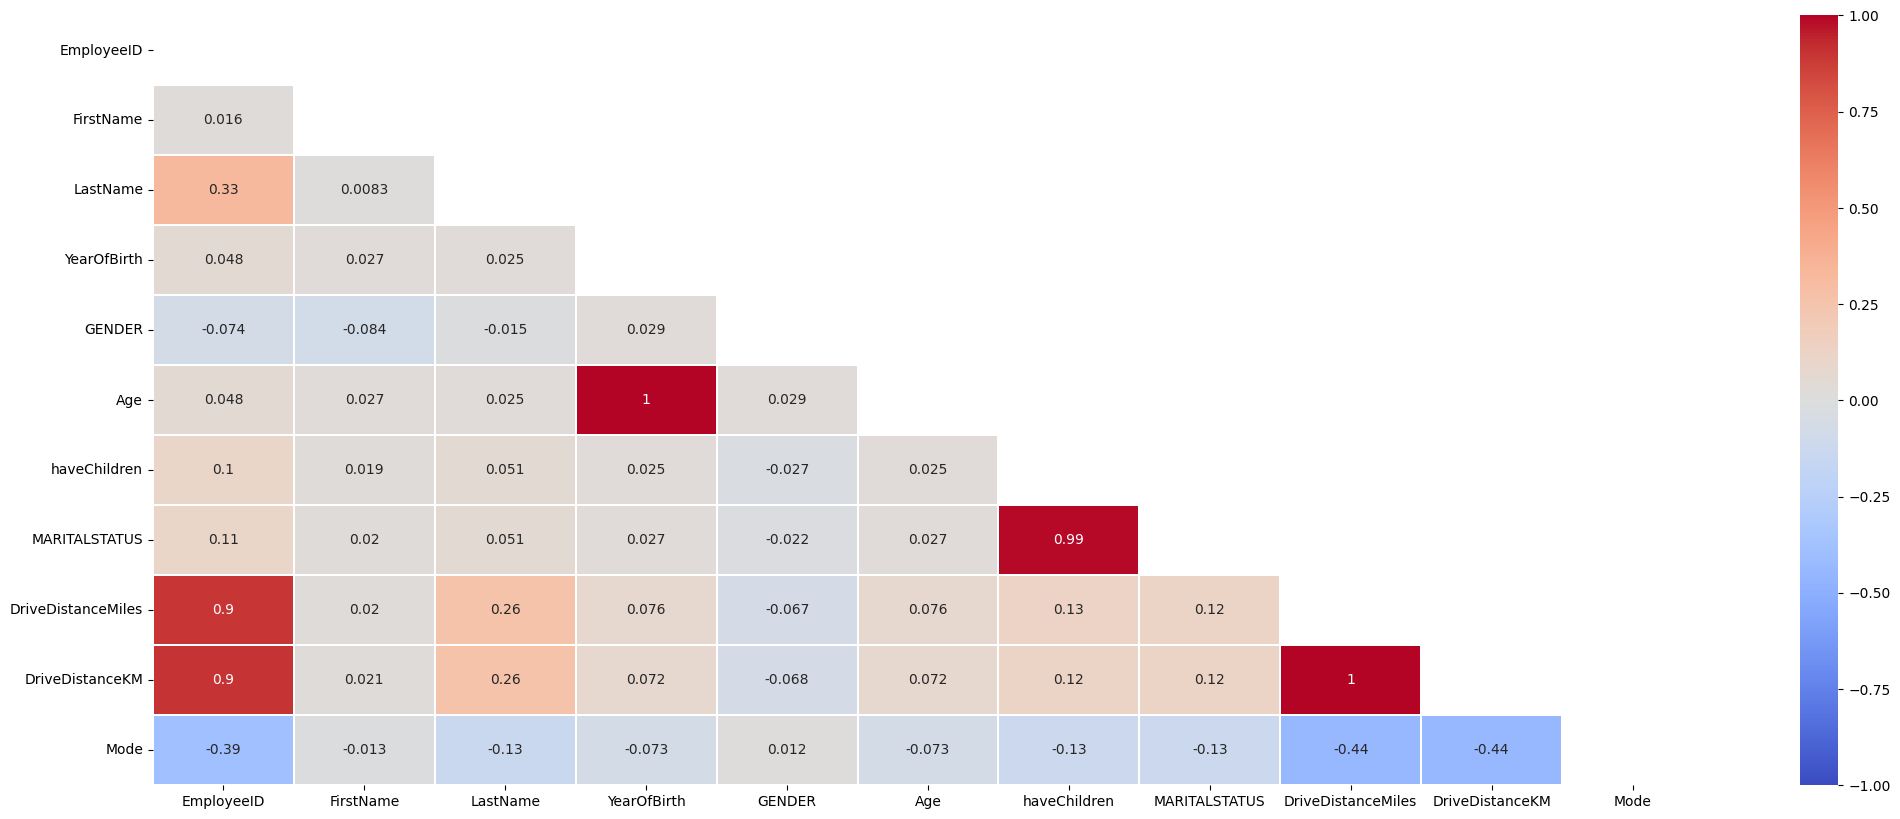

In [ ]:
plt.figure(figsize=(25, 10))

corr = trainData.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Function Preprocessing Data

In [ ]:
def preprocessingData(df, isTraining = True, leGender = None):

  # Delete irrelevant feature
  dfCleaned = df.drop(['EmployeeID', 'FirstName', 'LastName', 'YearOfBirth', 'MARITALSTATUS', 'DriveDistanceKM'], axis = 1)

  # Handle Missing Value using Imputasi
  # dfCleaned['MARITALSTATUS'].fillna(dfCleaned['MARITALSTATUS'].mode()[0], inplace=True)
  dfCleaned['GENDER'].replace({'FEMALE' : 'F', 'MALE' : 'M'}, inplace = True)
  genderModus = dfCleaned['GENDER'].mode()[0]
  dfCleaned['GENDER'].replace('Unknown', genderModus, inplace = True)
  # dfCleaned['DriveDistanceKM'].fillna(dfCleaned['DriveDistanceKM'].mean(), inplace=True)

  # Handle Standarisasi Class
  modeReplacements = {
      'Pubilc Transportation': 'Public Transportation',
      'Pbulic Transportation': 'Public Transportation',
      'Public Transportasion': 'Public Transportation',
      'Public-Transportation': 'Public Transportation',
      'PublicTransportation': 'Public Transportation'
  }

  dfCleaned['Mode'].replace(modeReplacements, inplace=True)
  if isTraining:
    leGender = LabelEncoder()
    leMode = LabelEncoder()

    dfCleaned['GENDER'] = leGender.fit_transform(dfCleaned['GENDER'])
    dfCleaned['Mode'] = leMode.fit_transform(dfCleaned['Mode'])

    logging.info("Training data preprocessing completed.")
    return dfCleaned, leGender, leMode

  else:
    dfCleaned['GENDER'] = leGender.transform(dfCleaned['GENDER'])
    dfCleaned = dfCleaned.drop(['Mode'], axis = 1)
    # dfCleaned['Mode'] = leMode.transform(dfCleaned['Mode'])

    logging.info("Test data preprocessing completed.")
    return dfCleaned


## Test Preprocessing Data

In [ ]:
trainCleaned, leGender, leMode = preprocessingData(trainData)

2024-09-16 07:53:18,710 - INFO - Training data preprocessing completed.


In [ ]:
trainCleaned.head()

,GENDER,Age,haveChildren,DriveDistanceMiles,Mode
0,0,31,0,0.34,1
1,1,53,0,0.41,2
2,0,37,0,0.49,0
3,1,41,0,0.50,0
4,1,87,1,0.50,2


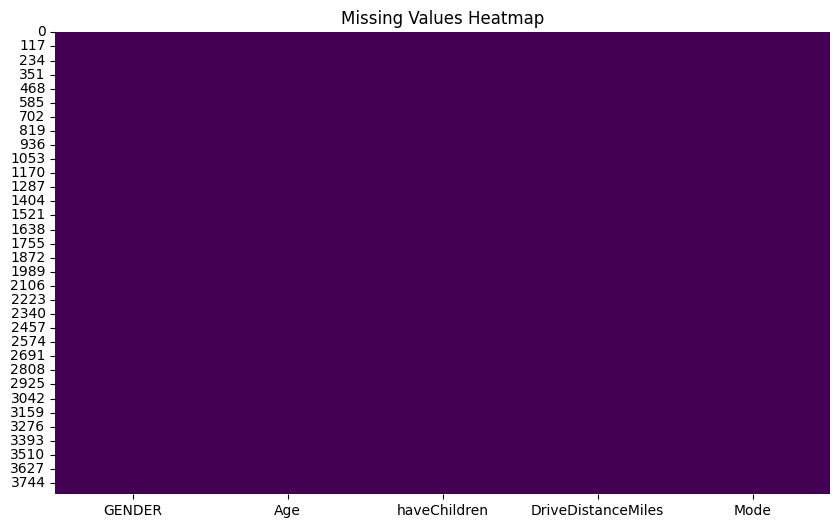

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(trainCleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
modeCounts = trainCleaned['Mode'].value_counts()
print(modeCounts)

Mode
1    2381
2    1133
0     324
Name: count, dtype: int64


1 = Car, 0 = Bike, 2 = Public Trasnportation

# Function Split Data

In [ ]:
def splitData(df):
  X = df.drop('Mode', axis=1)
  y = df['Mode']
  XTrain, XVal, yTrain, yVal = train_test_split(X, y, test_size=0.2, random_state = 30)
  logging.info("Data Splitting Succes")
  return XTrain, XVal, yTrain, yVal

## Test Split Data

In [ ]:
XTrain, XVal, yTrain, yVal = splitData(trainCleaned)

2024-09-16 07:53:19,258 - INFO - Data Splitting Succes


In [ ]:
XTrain.head()

,GENDER,Age,haveChildren,DriveDistanceMiles
2886,1,55,1,16.91
1954,1,66,1,8.26
1972,0,30,1,8.35
280,1,80,0,4.37
2208,1,44,1,9.50


In [ ]:
yTrain.head()

,Mode
2886,1
1954,1
1972,2
280,2
2208,2


# Function Modelling & Training

In [ ]:
def trainModel(XTrain, yTrain):
  randomForest = RandomForestClassifier(random_state = 30)
  randomForest.fit(XTrain, yTrain)
  logging.info("Random Forest trained")
  return randomForest

## Test Training

In [ ]:
modelRF = trainModel(XTrain, yTrain)

2024-09-16 07:53:19,892 - INFO - Random Forest trained


# Function Evaluate Model

In [ ]:
def evaluateModel(model, XVal, yVal, leMode):

    yPred = model.predict(XVal)
    accuracy = accuracy_score(yVal, yPred)
    logging.info(f"Validation Accuracy: {accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")

    logging.info("Classification Report:\n" + classification_report(yVal, yPred))

    conf_matrix = confusion_matrix(yVal, yPred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=leMode.classes_, yticklabels=leMode.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Test Evaluate

2024-09-16 07:53:19,940 - INFO - Validation Accuracy: 91.93%
2024-09-16 07:53:19,954 - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        57
           1       0.93      0.94      0.94       467
           2       0.91      0.89      0.90       244

    accuracy                           0.92       768
   macro avg       0.90      0.91      0.90       768
weighted avg       0.92      0.92      0.92       768



Validation Accuracy: 91.93%


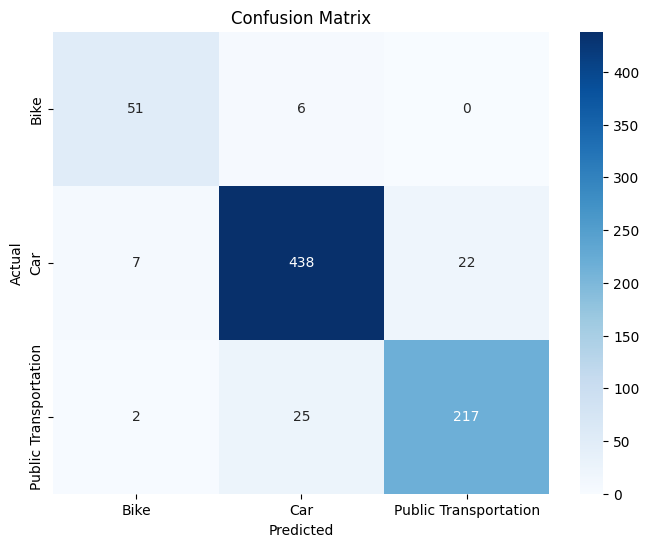

In [ ]:
evaluateModel(modelRF, XVal, yVal, leMode)

# Save The Prediction

In [ ]:
def savePredictions(testData, predictions, leMode, output_path):
    testData['PredictedMode'] = leMode.inverse_transform(predictions)
    testData[['EmployeeID', 'PredictedMode']].to_csv(output_path, index=False)
    logging.info(f"Test predictions saved to {output_path}")

# Main

In [ ]:
def main(trainPath, testPath, outputPath):
  startTime = time.time()

  trainData, testData = loadData(trainPath, testPath)

  trainCleaned, leGender, leMode = preprocessingData(trainData)

  XTrain, XVal, yTrain, yVal = splitData(trainCleaned)

  modelRF = trainModel(XTrain, yTrain)

  evaluateModel(modelRF, XVal, yVal, leMode)

  testCleaned = preprocessingData(testData, isTraining=False, leGender=leGender)

  predictTest = modelRF.predict(testCleaned)

  savePredictions(testData, predictTest, leMode, outputPath)

  endTime = time.time()
  logging.info(f"Pipeline completed in {endTime - startTime:.2f} seconds.")



2024-09-16 07:53:20,324 - INFO - Data load is success
2024-09-16 07:53:20,336 - INFO - Training data preprocessing completed.
2024-09-16 07:53:20,344 - INFO - Data Splitting Succes
2024-09-16 07:53:20,747 - INFO - Random Forest trained
2024-09-16 07:53:20,771 - INFO - Validation Accuracy: 91.93%
2024-09-16 07:53:20,785 - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        57
           1       0.93      0.94      0.94       467
           2       0.91      0.89      0.90       244

    accuracy                           0.92       768
   macro avg       0.90      0.91      0.90       768
weighted avg       0.92      0.92      0.92       768



Validation Accuracy: 91.93%


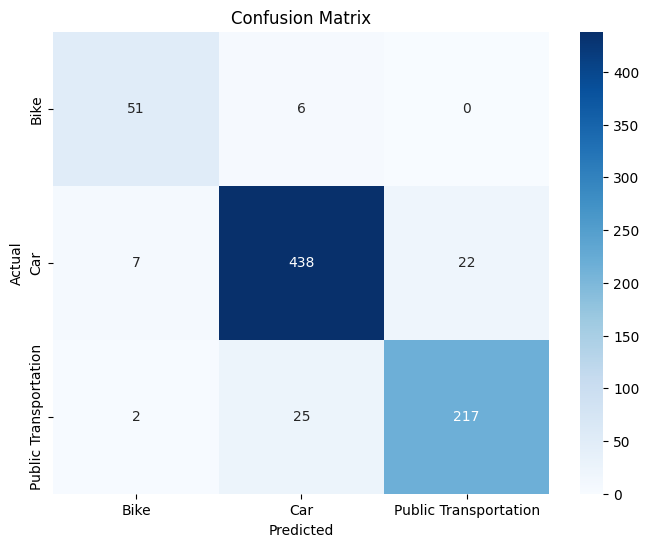

2024-09-16 07:53:21,085 - INFO - Test data preprocessing completed.
2024-09-16 07:53:21,140 - INFO - Test predictions saved to /content/drive/MyDrive/GDP Labs Test/predictTest.csv
2024-09-16 07:53:21,143 - INFO - Pipeline completed in 0.84 seconds.


In [ ]:
main('/content/drive/MyDrive/GDP Labs Test/help_mr_sunarto_train.csv', '/content/drive/MyDrive/GDP Labs Test/help_mr_sunarto_test.csv', '/content/drive/MyDrive/GDP Labs Test/predictTest.csv')